## Assessment 3
### Problem 2: Write a program to implement the new CNN model. The model should contains following things (use any grayscale dataset with the 10 classes). 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

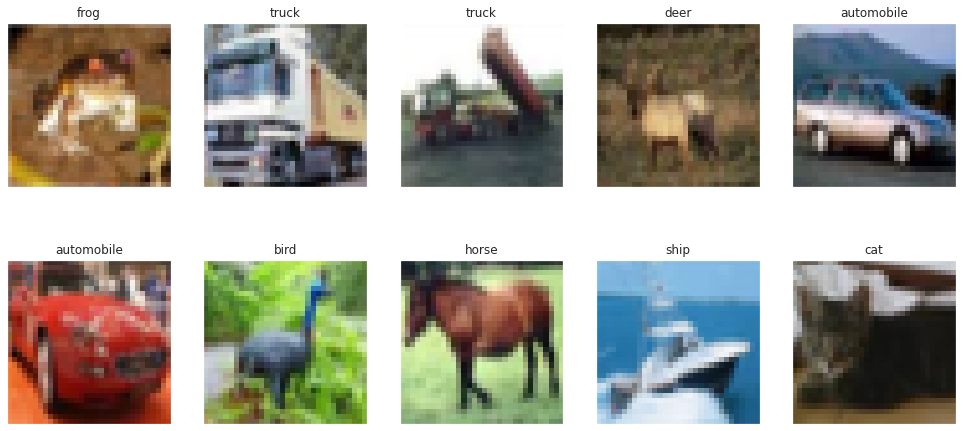

In [3]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(17, 8))
index = 0
for i in range(2):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [4]:
import cv2
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

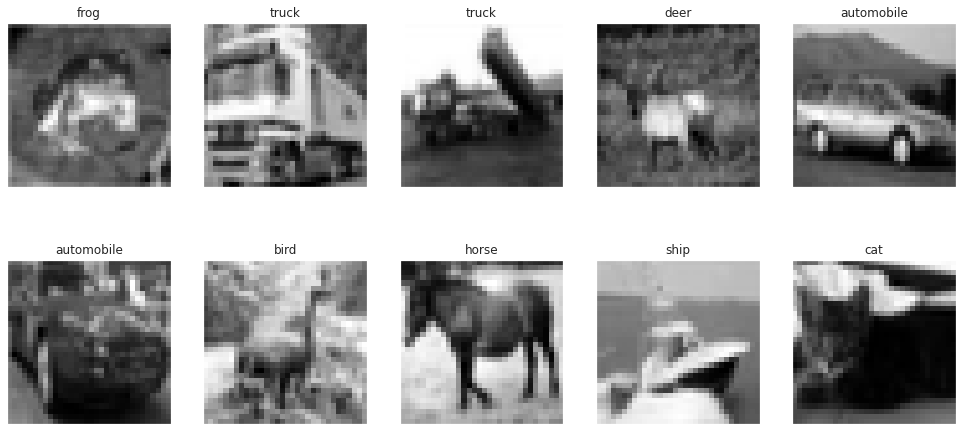

In [5]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(17, 8))
index = 0
for i in range(2):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [6]:
X_train  = X_train/255
X_test  = X_test/255

In [7]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [8]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape

(50000, 32, 32, 1)

In [10]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(32, 32, 1)

### **Model**
##### ***Convolution 1*** --->input(32, 32, 1)  --->no. of filters =  6  ---> filter(5, 5)  --->strides = 1  --->activation(relu)  --->output(28, 28, 6)
##### ***SubSampling 1***  Averagepooling2D --->input(28, 28, 6)  ---> filter(2, 2)  --->strides = 2  --->output(14, 14, 6)
##### ***Convolution 2*** --->input(14, 14, 6)  --->no. of filters =  16  ---> filter(5, 5)  --->strides = 1  --->activation(relu)  --->output(10, 10, 16)
##### ***SubSampling 2***  Averagepooling2D --->input(10, 10, 16)  ---> filter(2, 2)  --->strides = 2  --->output(5, 5, 16)
##### ***FullyConnected 1*** --->input(5, 5, 16)  --->activation(relu)  --->output(120)
##### ***FullyConnected 2*** --->input(120)  --->activation(relu)  --->output(84)
##### ***Output*** --->input(84)  --->activation(softmax)  --->output(10)

In [11]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9776 - acc: 0.2752 - val_loss: 1.5926 - val_acc: 0.4180
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5403 - acc: 0.4458 - val_loss: 1.4377 - val_acc: 0.4797
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3977 - acc: 0.5026 - val_loss: 1.3832 - val_acc: 0.5085
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3016 - acc: 0.5407 - val_loss: 1.3103 - val_acc: 0.5387
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2289 - acc: 0.5652 - val_loss: 1.3023 - val_acc: 0.5457
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1711 - acc: 0.5858 - val_loss: 1.2634 - val_acc: 0.5625
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1269 - acc: 0.6033 - val_loss: 1.2593 - val_acc: 0.5618
Epoch 8/20
1563/1563 [==========================

In [14]:
model.save('CustomCNNusingCIFAR_10.h5')

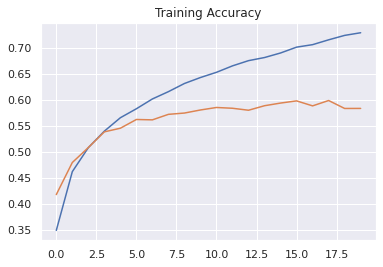

In [15]:
plt.title('Training Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

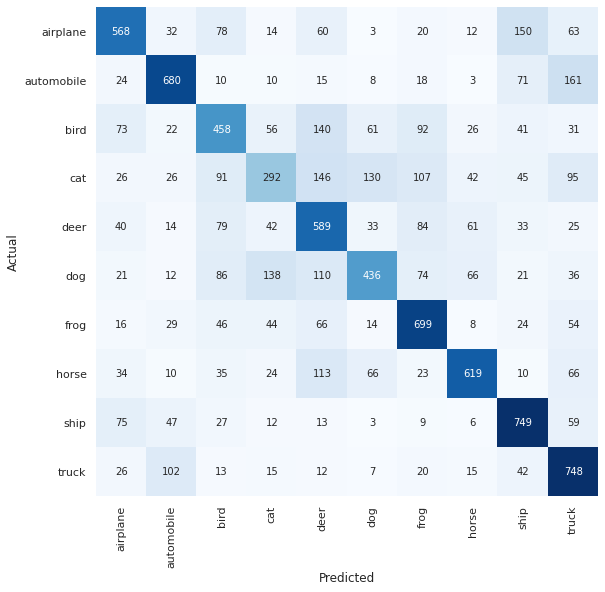

In [16]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()